Start smart plot
y = x ∙ ( 0.210  ±  0.058 ) + ( 4.254 ±  0.184 )
y = x ∙ ( 0.283  ±  0.089 ) + ( 9.243 ±  0.281 )
y = x ∙ ( 0.011  ±  0.004 ) + ( 7.474 ±  0.013 )
y = x ∙ ( 0.011  ±  0.000 ) + ( 7.529 ±  0.001 )


<Figure size 432x288 with 0 Axes>

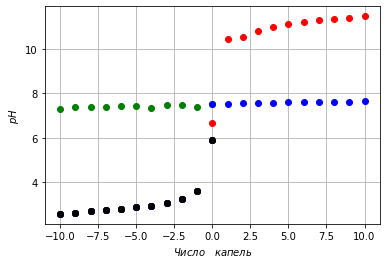

Start smart plot
y = x ∙ ( 0.029  ±  0.002 ) + ( 0.008 ±  0.002 )
y =  392.834 ∙ exp(x ∙  0.000 ) + ( -392.826 )


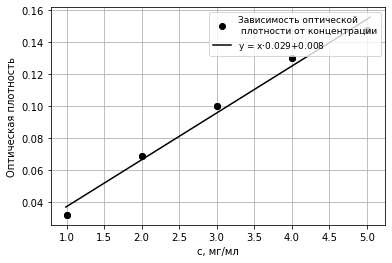

In [2]:
import xlrd, xlwt
import matplotlib.pyplot as plt
import numpy
import numpy as np
import math
import scipy
import scipy.optimize

#errors
def get_a_b(X, Y, sdvig=5):
    global precision
    sdvig = len(X)
    XY = [[X[j][i]*Y[j][i] for i in range(len(X[j]))] for j in range(sdvig)]
    X2 = [[X[j][i]*X[j][i] for i in range(len(X[j]))] for j in range(sdvig)]
    Y2 = [[Y[j][i]*Y[j][i] for i in range(len(X[j]))] for j in range(sdvig)]

    B = [(sum(XY[j])/len(XY[j]) - (sum(X[j])/len(X[j]))*(sum(Y[j])/len(Y[j])))/(sum(X2[j])/len(X2[j])-(sum(X[j])/len(X[j]))*(sum(X[j])/len(X[j]))) for j in range(sdvig)]
    #B = [for j in range(sdvig)]

    A = [sum(Y[j])/len(Y[j]) - B[j]*(sum(X[j])/len(X[j])) for j in range(sdvig)]
    SIGMA_B = [(1/(len(Y[j]))**0.5) * (( (sum(Y2[j])/len(Y2[j])-(sum(Y[j])/len(Y[j]))**2)/((sum(X2[j])/len(X2[j])-(sum(X[j])/len(X[j]))**2)) - B[j]**2 )**0.5) for j in range(sdvig)]
    SIGMA_A = [SIGMA_B[j] * (((sum(X2[j])/len(X2[j])-(sum(X[j])/len(X[j]))**2)) - B[j]**2 )**0.5 for j in range(sdvig)]

    for i in range(sdvig):
        print(
            f"y = x ∙ (",
            f"%.{precision}f" % (B[i]),
            " ± ",
            f"%.{precision}f" % abs(SIGMA_B[i]),
            ") + (",
            f"%.{precision}f" % (A[i]),
            "± ",
            f"%.{precision}f" % abs(SIGMA_A[i]),
            ")")
    return A, B, [abs(item) for item in SIGMA_A], [abs(item) for item in SIGMA_B]


def smart_plot(X, Y, XERR, YERR, inv = 0, xlabel = "X", ylabel = "Y", description_arr = []):
    colors = ["BLACK",
              "RED",
              "GREEN",
              "BLUE",
              "VIOLET",
              "YELLOW",
              "CORAL",
              "GRAY"]
    dot_colors = ["ko", "ro", "go", "bo", "mo", "yo", "co", "bo"]
    _first_litter_value, s_legend = plt.subplots()
    print("Start smart plot")
    
    A, B, SIGMA_A, SIGMA_B = get_a_b(X, Y, len(X))
    l_array = []
    
    for i in range(len(X)):
        s_legend.errorbar(X[i], Y[i],  xerr=XERR[i], yerr=YERR[i], fmt=dot_colors[i], ecolor=colors[i],linewidth=0.5)
        dens, = plt.plot(X[0], Y[0], dot_colors[i], zorder=1)
        min_all = min(X[i])
        max_all = max(X[i])
        xx = np.arange(min_all*0.99, max_all*1.01, (max_all-min_all)/1000)
        if inv != 1:
            if inv == 0:
                l, = plt.plot(xx, xx*B[i] + A[i], color = colors[i])
            elif inv == "exp":
                arr = (scipy.optimize.curve_fit(lambda t,a,b,c: a*numpy.exp(b*t)+c,
                                                X[i],  Y[i],
                                                maxfev=5000)[0])
                # print(f"y = {arr[0]}∙exp({arr[1]}∙x) + {arr[2]} ")
                print(
                    f"y = ",
                    f"%.{precision}f" % (arr[0]),
                    "∙ exp(x ∙ ",
                    f"%.{precision}f" % (arr[1]), 
                    ") + (",
                    f"%.{precision}f" % (arr[2]),
                    ")")
                l, = plt.plot(xx, arr[0]*np.exp(arr[1]*xx) + arr[2], color = colors[i])
        if (i!=1):
            l_array.append(dens)
        if inv != 1:
            l_array.append(l)
    if (len(description_arr) > 0):
        label_array = [description_arr[0]] + ["y = x$\cdot$" + 
                                       (f"%.{precision}f" % (B[inter])) + ("+" if (A[inter] > 0) else "-") + 
                                       (f"%.{precision}f" % (A[inter])) + "  " + description_arr[inter+1] for inter in range(len(X))]    
        plt.legend(l_array, label_array, loc='upper right', fontsize=9)

    s_legend.grid()
    s_legend.set_xlabel(xlabel)
    s_legend.set_ylabel(ylabel)

def to_number(string_index):
    res_index = 0
    for i in range(len(string_index)):
        item = string_index[i]
        ord_index = ord(item)
        if ord_index < 95:
            ord_index = ord_index - (ord('A')-1)
        else:
            ord_index = ord_index - (ord('a')-1)
        res_index += 26 ** (len(string_index)-i-1) * ord_index
    return res_index - 1

class Point:
    x = 0
    y = 0
    def __init__(self, x, y):
        self.x = to_number(x)
        self.y = y

class Arr_excel:
    p_start = Point("A", 0)
    p_end = Point("D", 0)
    
    def __init__(self, x1, y1, x2, y2):
        self.p_start = Point(x1, y1)
        self.p_end = Point(x2, y2)
        # A = Arr_excel("A", 0, "D", 0)
        
class Graph_excel:
    # Это график: есть ось X, есть Y: сначала заполняем поля графика по X а потом по Y
    # Для того чтобы создать график заполняем начальную точку: нам нужно указать 
    # стартовую точку оси X в таблице Excel и Y и после этого нужно указать конечную 
    # точку массива
    X = Arr_excel(
            "A", 0,
            "A", 10),
    Y = Arr_excel(
            "B",0,
            "B",10)

    
    def fill_data(self, data):
        # fill X
        x_1 = self.X.p_start.x
        y_1 = self.X.p_start.y
        x_2 = self.X.p_end.x
        y_2 = self.X.p_end.y
        pre_X_ARR = [[(data(y_1+i)[j+x_1]) for i in range(y_2-y_1+1)] for j in range(x_2-x_1+1)]
        if len(pre_X_ARR) > 1:
            self.X_ARR = [item[0] for item in pre_X_ARR]
        else:
            self.X_ARR = pre_X_ARR[0]
            
        # fill Y
        x_1 = self.Y.p_start.x
        y_1 = self.Y.p_start.y
        x_2 = self.Y.p_end.x
        y_2 = self.Y.p_end.y
        pre_Y_ARR = [[(data(y_1+i)[j+x_1]) for i in range(y_2-y_1+1)] for j in range(x_2-x_1+1)]
        if len(pre_Y_ARR) > 1:
            self.Y_ARR = [item[0] for item in pre_Y_ARR]
        else:
            self.Y_ARR = pre_Y_ARR[0]
    
    def __init__(self, 
                 start_X_x, start_X_y, 
                 end_X_x, end_X_y, 
                 start_Y_x, start_Y_y, 
                 end_Y_x, end_Y_y,):
        self.X = Arr_excel(
            start_X_x, start_X_y-1,
            end_X_x, end_X_y-1)
        
        self.Y = Arr_excel(
            start_Y_x, start_Y_y-1,
            end_Y_x, end_Y_y-1)
        # A = Graph_excel("A", 0, "D", 0, "A", 1, "D", 1)
        # Нам нужно выбить начальную точку и конечную для каждого из массивов,
        # можно вбивать как столбцы так и строки - главное чтобы была только одна 
        # варьируемая координата
        self.X_ARR = []
        self.Y_ARR = []


# Основные настройки к эксель талице
file_name = "C://MIPT//Labs//511//test//511.xls"
number_of_sheet = 1


rb = xlrd.open_workbook(file_name)
sheet = rb.sheet_by_index(number_of_sheet - 1)

# указываем графики: их границы:  начальная и конечная точки, X и Y оси
G_1 = Graph_excel("Q", 3, "Q", 13, "R", 3, "R", 13)
G_1.fill_data(sheet.row_values)
G_2 = Graph_excel("T", 3, "T", 13, "U", 3, "U", 13)
G_2.fill_data(sheet.row_values)
G_3 = Graph_excel("Z", 3, "Z", 13, "AA", 3, "AA", 13)
G_3.fill_data(sheet.row_values)
G_4 = Graph_excel("AC", 3, "AC", 13, "AD", 3, "AD", 13)
G_4.fill_data(sheet.row_values)

G_res = Graph_excel("AF", 3, "AF", 7, "AH", 3, "AH", 7)
G_res.fill_data(sheet.row_values)

X=[G_1.X_ARR, G_2.X_ARR, G_3.X_ARR, G_4.X_ARR]
Y=[G_1.Y_ARR, G_2.Y_ARR, G_3.Y_ARR, G_4.Y_ARR]


#error bars - указывем ошибки к соответствующим величинам
XERR = [[ 0.001 for i in range(len(X[j]))] for j in range(len(X))]
YERR = [[ 0.001 for i in range(len(Y[j]))] for j in range(len(Y))]

# точность с которой расчитываеются величины
precision = 3

# пояснение к графикам
d_arr = [
    "Зависимость \nнапряжения от фототока",
    "| $\lambda$ = 703.2нм",
    "| $\lambda$ = 659.9нм",
    "| $\lambda$ = 620.2нм",
    "| $\lambda$ = 585.8нм"]

# пояснение к осям графика
xlabel="$Число \quad капель$"
ylabel="$pH$"

plt.figure()
smart_plot(X=X,
           Y=Y,
           XERR=XERR,
           YERR=YERR, 
           inv=1,
           xlabel=xlabel,
           ylabel=ylabel,
           description_arr=[])
plt.show()
smart_plot(X=[G_res.X_ARR],
           Y=[G_res.Y_ARR],
           XERR=[[ 0 for i in range(5)]],
           YERR=[[ 0 for i in range(5)]], 
           inv="exp", # 1 - without fit | 0 - lineral | "exp" -  | "poly_<n>" - polinom with n degre
           xlabel="c, мг/мл",
           ylabel="Оптическая плотность",
           description_arr=["Зависимость оптической \n плотности от концентрации", ""])
plt.show()